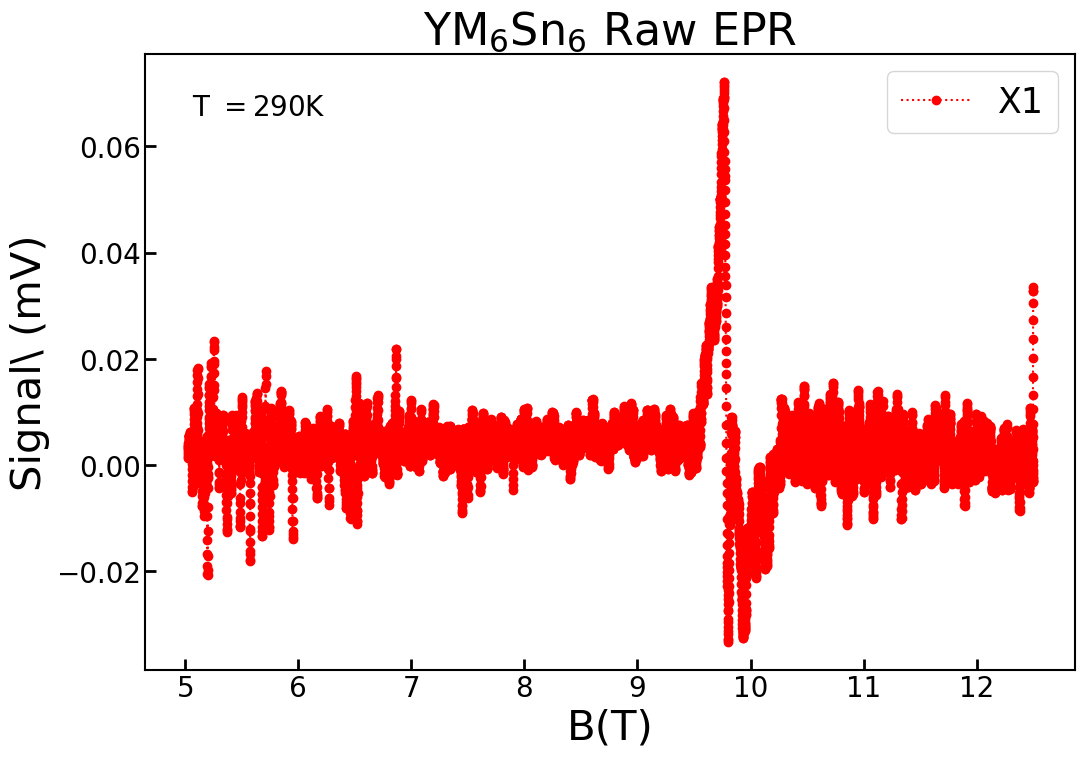

In [80]:
##########-----
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
from numpy.core.multiarray import ndarray
import math
import numpy as np
import matplotlib as mpl
import matplotlib.backends.backend_pdf
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from scipy.odr import Model
from xlrd import open_workbook
from scipy.optimize import curve_fit
from pandas import read_csv
import statistics
import scipy as scipy
from scipy import optimize
import matplotlib.ticker as ticker
#import lmfit
import scipy.constants as scpc
import random
#######################################################
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['mathtext.default'] = 'regular'
mpl.rcParams['font.size'] = 75
mpl.rcParams['font.family'] = 'Sans Serif'
mpl.rcParams['axes.labelsize'] = 36
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['ytick.direction'] = "in"
# Loading Data ###
datafiles=[
         #"cw_5K_Par_300GHz",
    #"cw_10K_Par_300GHz",
    #"cw_15K_Par_300GHz",
    #"cw_20K_Par_300GHz",
    #"cw_28K_Par_300GHz",
    #"cw_40K_Par_300GHz",
    #"cw_60K_Par_300GHz",
    #"cw_80K_Par_300GHz",
    #"cw_100K_Par_300GHz",
    #"cw_150K_Par_300GHz",
    #"cw_200K_Par_300GHz",
    "cw_290K_Par_300GHz"
        ]

### Dictionaries ###
dict_data={}

### Fit Functions ###

def dLorentzian(x, amp, cen, wid):
        df = (- amp * wid/(2*math.pi)* (x - cen))/(((x - cen)**2 + (wid/2)**2)**2)
        return df
    
####### Beginning Loop through all datafiles, commands will be repeated for each upsweep and downsweep file ########
for i in range(len(datafiles)):
    
######### Parsing filename for temperature ##############################
    temp=datafiles[i][3:16]
    while temp[-1]!="K":
        temp=temp[0:len(temp)-1]
    temp=temp.replace("p", "." )
    temp2=float(temp[0:-1])
  

    
######## Parsing for header length ######################################
    file=open(datafiles[i]+".dat")
    data=file.readlines()
    for n, line in enumerate(data):
        array=line.split('\s+')
        if array[0][0:6]==">BEGIN":
            header_index=n
            #print(header_index)
            break
    file.close()
    
### Sorting ###
    data_u=np.array(pd.read_csv(datafiles[i]+".dat", sep='\s+',header=header_index))

    angle=15
    
    B_field=data_u[:,0]
    X1=data_u[:,1]
    X2=data_u[:,2]
    X1_corrected=X1*np.cos(np.radians(angle))+X2*np.sin(np.radians(angle))
    
### Correcting the Data ###

    
### Loading Data into Dictionarires ###
    dict_data[datafiles[i]]=[B_field, X1, X2, temp, X1_corrected]
############## Create RAW data Figures For Each Temperature #####################
for i in datafiles:
    fig1,ax=plt.subplots()
    fig1.set_size_inches(12,8)
    fig1.subplots_adjust(hspace=.0)
    fig1.patch.set_facecolor('white')
    
    ax.plot(dict_data[i][0], dict_data[i][4], color="red", linestyle="dotted", marker='o', label="X1")
    #ax.plot(dict_data[i][0], dict_data[i][2], color="blue", linestyle="dotted", marker='o', label="X2")
    ax.annotate(r'$T\ = $'+str(dict_data[i][3]),ha='left', xy=(0.05, 0.9),xycoords='axes fraction', fontsize=20)
    ax.legend(loc='upper right', prop={'size': 25}, )
    props = dict(boxstyle='round', facecolor='gray', alpha=0.5)
            
    plt.title(label = r'$\mathrm{YM_6Sn_6\ Raw\ EPR}$', fontsize = 32)
    ax.set_xlabel("B(T)", fontsize=30)
    ax.set_ylabel("Signal\ (mV)",fontsize=30)
    #ax.set_ylim(0.032,0.036)
    #ax.set_xlim(4,4.6)
    ax.tick_params(axis='both', which='major', labelsize=20)